<a href="https://colab.research.google.com/github/lluk4z/Projeto-final-IA/blob/main/Artists_o_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install optuna

In [11]:
!pip install scikit-plot

In [12]:
!pip install tensorflow

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
import io


import sklearn.metrics
from scipy import stats

import scikitplot as skplt
import matplotlib


from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

import plotly.express as px 
import plotly.graph_objs as pgo 
from plotly.subplots import make_subplots 

import seaborn as sns

from wordcloud import WordCloud

from collections import Counter

import random
from math import floor

from sklearn import metrics

import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score

import optuna

from sklearn import svm
from sklearn.metrics import classification_report


In [14]:
uploaded = files.upload()

Saving data_by_artist_o.csv to data_by_artist_o (1).csv


In [15]:
df = pd.read_csv(io.StringIO(uploaded['data_by_artist_o.csv'].decode('utf-8')))

In [16]:
df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [17]:
df.isna().sum()

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [19]:
df['duration'] = df['duration_ms'].apply(lambda x:round(x/1000))
df.drop('duration_ms',axis=1,inplace=True)
df.drop(['genres','key','mode'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,28680.0,0.498373,0.370614,0.0,0.122296,0.478458,0.896000,0.996
count,28680.0,13.847211,53.372544,1.0,2.000000,3.000000,8.000000,3169.000
danceability,28680.0,0.546490,0.176474,0.0,0.431000,0.557000,0.675000,0.986
duration,28680.0,238.877266,121.135267,19.0,182.000000,219.000000,268.000000,5404.000
energy,28680.0,0.497488,0.254885,0.0,0.283568,0.504000,0.702783,1.000
instrumentalness,28680.0,0.174756,0.298406,0.0,0.000004,0.001880,0.215291,1.000
liveness,28680.0,0.202441,0.140884,0.0,0.110363,0.161000,0.247000,0.991
loudness,28680.0,-11.140498,5.771749,-60.0,-13.972292,-10.088938,-6.889000,1.342
popularity,28680.0,34.060945,22.376438,0.0,12.000000,39.000000,51.000000,93.000
speechiness,28680.0,0.094014,0.111986,0.0,0.039200,0.052200,0.095300,0.964


In [20]:
df[df['genres']=="[]"]

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26,287
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7,329
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27,263
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7,270
5,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,1,36,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28671,[],須田景凪,0.028100,0.559000,0.873000,0.000000,0.185000,-4.401000,0.054300,150.055000,0.797000,67.000000,0,0,2,210
28672,[],高慧君,0.686000,0.520000,0.285000,0.000000,0.093100,-10.754000,0.027000,93.922000,0.079800,53.000000,10,1,2,287
28674,[],鹿谷樹,0.006550,0.603000,0.964000,0.000003,0.143000,-2.886000,0.048700,135.028000,0.796000,76.000000,8,0,2,206
28675,[],麥志誠,0.512000,0.356000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2,199


In [21]:
df = df[df['genres']!="[]"]

In [22]:
df.head()

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,250
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,219
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,138
10,"['dark trap', 'meme rap']",$atori Zoom,0.239000,0.883000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2,142
12,"['asian american hip hop', 'cali rap', 'west c...",$tupid Young,0.148100,0.854000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2,191


In [23]:
vet_genres = []
for i in df['genres']:
  vet_genres.append(i.replace("[", "").replace("]", "").replace("'", "").replace(" "" ", ""))

In [24]:
df['genres'] = vet_genres

In [25]:
df

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
0,show tunes,"""Cats"" 1981 Original London Cast",0.590111,0.467222,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,250
8,"comedy rock, comic, parody","""Weird Al"" Yankovic",0.173145,0.662787,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122,219
9,"emo rap, florida rap, sad rap, underground hip...",$NOT,0.544467,0.789800,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15,138
10,"dark trap, meme rap",$atori Zoom,0.239000,0.883000,0.625000,0.000000,0.076500,-4.098000,0.245000,126.677000,0.871000,67.000000,6,1,2,142
12,"asian american hip hop, cali rap, west coast trap",$tupid Young,0.148100,0.854000,0.683000,0.000002,0.188500,-6.997000,0.221000,100.724500,0.625500,57.500000,1,1,2,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28667,classic cantopop,陳麗斯,0.562000,0.550000,0.375000,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2,195
28673,"c-pop, classic mandopop, vintage chinese pop",鳳飛飛,0.884000,0.358000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,259
28676,"c-pop, classic cantopop, classic mandopop, man...",黃品源,0.541000,0.578000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2,294
28678,"chinese indie, chinese indie rock",黑豹,0.381000,0.353000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2,316


In [26]:
print(f"Number of unique genres : {df['genres'].nunique()}")

Number of unique genres : 10742


In [27]:
print("Most popular genres")
df.sort_values("popularity",ascending=False)

Most popular genres


,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
20966,bedroom pop,Ritt Momney,0.05630,0.3990,0.4910,0.000890,0.11000,-10.77800,0.053800,91.066,0.15100,93.0,6,0,2,210
14354,"latin pop, viral pop",Lele Pons,0.09070,0.9050,0.6860,0.000000,0.26600,-3.15200,0.066400,103.013,0.96300,92.0,0,1,1,156
11764,"cubaton, latin, pop venezolano, reggaeton, tra...",Jerry Di,0.81900,0.8540,0.5250,0.000000,0.14600,-4.42600,0.214000,97.054,0.63000,89.0,1,1,2,198
23687,tropical house,Surf Mesa,0.06860,0.6740,0.7740,0.001880,0.39300,-7.56700,0.089200,112.050,0.33000,88.0,11,0,1,177
28263,modern indie pop,salem ilese,0.42400,0.7380,0.6210,0.000007,0.69200,-7.31300,0.048600,113.968,0.71500,88.0,0,1,2,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7542,"easy listening, exotica, lounge",Enoch Light,0.83125,0.6855,0.4175,0.000058,0.28875,-10.48325,0.049275,132.917,0.75175,0.0,3,1,4,167
11630,"chanson, ye ye",Jeanne Moreau,0.89100,0.4780,0.3480,0.000059,0.25400,-21.40900,0.576000,77.167,0.08270,0.0,7,1,1,203
15960,puerto rican folk,Manuel Jimenez Y Su Cuarteto,0.70400,0.7310,0.8120,0.000000,0.06040,-7.87600,0.091300,111.152,0.96400,0.0,2,1,2,181
21941,"bhajan, hindustani classical, hindustani vocal...",Sanjeev A,0.99000,0.2160,0.0942,0.067200,0.09950,-10.63100,0.036700,100.939,0.03420,0.0,7,1,1,55


In [28]:
print("Least popular genres")
df.sort_values("popularity",ascending=False).tail()

Least popular genres


,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
7542,"easy listening, exotica, lounge",Enoch Light,0.83125,0.6855,0.4175,0.000058,0.28875,-10.48325,0.049275,132.917,0.75175,0.0,3,1,4,167
11630,"chanson, ye ye",Jeanne Moreau,0.89100,0.4780,0.3480,0.000059,0.25400,-21.40900,0.576000,77.167,0.08270,0.0,7,1,1,203
15960,puerto rican folk,Manuel Jimenez Y Su Cuarteto,0.70400,0.7310,0.8120,0.000000,0.06040,-7.87600,0.091300,111.152,0.96400,0.0,2,1,2,181
21941,"bhajan, hindustani classical, hindustani vocal...",Sanjeev A,0.99000,0.2160,0.0942,0.067200,0.09950,-10.63100,0.036700,100.939,0.03420,0.0,7,1,1,55
8863,"baroque, musica antigua, spanish baroque",Gaspar Sanz,0.99500,0.5090,0.2460,0.962000,0.14200,-20.24000,0.084500,116.111,0.82700,0.0,4,0,1,179


In [29]:
df.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
acousticness,1.000000,-0.387807,-0.803282,0.331713,-0.042605,-0.659817,-0.089721,-0.261421,-0.257588,-0.469206,-0.039828,0.110129,0.073213,-0.003473
danceability,-0.387807,1.000000,0.362739,-0.379418,-0.108980,0.475952,0.267208,0.097021,0.607796,0.257147,0.036452,-0.103378,-0.046723,-0.138883
energy,-0.803282,0.362739,1.000000,-0.346217,0.155757,0.800987,0.119440,0.318086,0.399940,0.356416,0.042207,-0.091695,-0.065889,-0.043853
instrumentalness,0.331713,-0.379418,-0.346217,1.000000,-0.042445,-0.530140,-0.163946,-0.166253,-0.328218,-0.223144,-0.034537,-0.022177,0.018161,0.150873
liveness,-0.042605,-0.108980,0.155757,-0.042445,1.000000,0.074176,0.186309,-0.022796,-0.018885,-0.081023,-0.013556,0.016584,0.023334,-0.000073
loudness,-0.659817,0.475952,0.800987,-0.530140,0.074176,1.000000,0.096102,0.298964,0.396050,0.350357,0.035504,-0.057648,-0.051283,-0.113912
speechiness,-0.089721,0.267208,0.119440,-0.163946,0.186309,0.096102,1.000000,0.009622,0.083362,0.035335,0.007903,-0.077584,-0.016384,-0.016129
tempo,-0.261421,0.097021,0.318086,-0.166253,-0.022796,0.298964,0.009622,1.000000,0.202712,0.103435,0.007861,-0.003752,-0.008195,-0.044845
valence,-0.257588,0.607796,0.399940,-0.328218,-0.018885,0.396050,0.083362,0.202712,1.000000,0.002103,0.047469,-0.004647,0.001084,-0.194415
popularity,-0.469206,0.257147,0.356416,-0.223144,-0.081023,0.350357,0.035335,0.103435,0.002103,1.000000,0.006986,-0.112473,-0.123719,-0.058295


In [30]:
df[df["artists"] == "Interpol"]

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
10858,"alternative dance, alternative rock, dance-pun...",Interpol,0.010766,0.368875,0.865542,0.542292,0.17525,-5.141167,0.048146,117.241917,0.387687,50.041667,7,1,48,263


In [31]:
for i in df['genres'].unique():
  if (i == 'skramz'):
    print(i)

In [32]:
array_generos = ['punk', 'emo', 'hardcore', 'shoegaze', 'screamo', 'metalcore', 'post-punk', 'post-hardcore', 'indie rockism', 'midwest emo', 'indie punk', 'skramz'
                 'post-rock','dance-punk', 'protopunk', 'pop punk', 'indie rock', 'skate punk', 'post-post-hardcore', 'emoviolence','australian post-hardcore',
                 'australian metalcore', 'swedish emo', 'russian shoegaze', 'spoken word', 'hardcore punk', 'dc hardcore', 'dreamo', 'blackgaze', 'melodic hardcore', 'dream pop'
                 
]

In [33]:
df_novo = df

In [34]:
artist_ar = []
cnt = 0
for j in range(len(df) - 1):
  for i in (df.iloc[j,0]).split(", "):
    for m in array_generos:
      for k in i.split(", "):
        if m == k:
          print(df.iloc[j,0])
          artist_ar.append(df.iloc[j,0])


print(cnt)
        

alternative rock, dance-punk, double drumming, indie rock, modern rock, post-hardcore
alternative rock, dance-punk, double drumming, indie rock, modern rock, post-hardcore
alternative rock, dance-punk, double drumming, indie rock, modern rock, post-hardcore
acid rock, classic garage rock, experimental, folk rock, freakbeat, protopunk, psychedelic rock
alternative metal, groove metal, melodic metalcore, metalcore, nu metal, rap rock
dance pop, electropowerpop, pop, pop punk, pop rap, post-teen pop
oi, punk, ska
hardcore, hardcore punk, melodic hardcore, punk, skate punk, straight edge, thrash core
hardcore, hardcore punk, melodic hardcore, punk, skate punk, straight edge, thrash core
hardcore, hardcore punk, melodic hardcore, punk, skate punk, straight edge, thrash core
hardcore, hardcore punk, melodic hardcore, punk, skate punk, straight edge, thrash core
hardcore, hardcore punk, melodic hardcore, punk, skate punk, straight edge, thrash core
oi, pub rock, punk
bubblegum pop, chicano pu

In [35]:
estrat_generos_teste = df_novo.loc[df_novo["genres"].isin(artist_ar)]


In [36]:
estrat_generos_teste

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
24,"alternative rock, dance-punk, double drumming,...",...And You Will Know Us by the Trail of Dead,0.008410,0.255000,0.858000,0.000355,0.513000,-5.085000,0.069400,144.653000,0.237000,36.000000,7,1,2,274
38,"acid rock, classic garage rock, experimental, ...",13th Floor Elevators,0.104675,0.511750,0.771750,0.387000,0.115800,-6.578000,0.076775,140.934000,0.764500,31.750000,2,0,8,155
89,"alternative metal, groove metal, melodic metal...",36 Crazyfists,0.001190,0.585000,0.931000,0.000025,0.115000,-4.843000,0.084700,160.079000,0.814000,53.000000,0,1,2,199
94,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3,0.020766,0.683750,0.793200,0.000044,0.317150,-3.929750,0.178530,125.772650,0.549650,53.950000,5,1,20,194
102,"oi, punk, ska",4 Skins,0.010400,0.265500,0.929500,0.000003,0.615500,-4.733000,0.125000,154.434500,0.498500,33.500000,11,0,4,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28231,"dreamo, emo, philly indie, progressive post-ha...",mewithoutYou,0.093700,0.469667,0.875000,0.292418,0.169733,-5.197000,0.063533,98.354667,0.476333,45.333333,9,1,6,248
28247,"alternative dance, alternative rock, anti-folk...",of Montreal,0.362814,0.727714,0.628571,0.048752,0.233071,-7.052857,0.050043,123.436857,0.676571,46.000000,5,1,14,272
28284,"indie garage rock, indie punk",together PANGEA,0.000030,0.211000,0.747000,0.191850,0.090400,-6.547500,0.052250,104.795500,0.506000,50.500000,9,1,4,199
28299,"funk metal, pop punk, punk, rap rock, skate punk",zebrahead,0.000634,0.522000,0.960667,0.000013,0.247000,-5.024000,0.119400,133.621000,0.493000,50.666667,8,1,6,193


In [37]:
estrat_generos_teste.to_csv('data_rock_triste.csv')

In [38]:
estrat_generos_teste = estrat_generos_teste.reset_index(drop=True)


In [39]:
estrat_generos_teste[estrat_generos_teste["artists"] == "At The Drive In"]

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
68,"alternative metal, alternative rock, dance-pun...",At The Drive In,0.066024,0.362,0.907857,0.000181,0.33,-4.155143,0.1662,141.608857,0.350857,40.285714,11,0,14,225


# **Usando o dado estratificado por genero**

In [40]:
df_2 = pd.read_csv('/content/data_rock_triste.csv')

In [41]:
df_2.head()

,Unnamed: 0,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
0,24,"alternative rock, dance-punk, double drumming,...",...And You Will Know Us by the Trail of Dead,0.008410,0.25500,0.85800,0.000355,0.51300,-5.08500,0.069400,144.65300,0.23700,36.00,7,1,2,274
1,38,"acid rock, classic garage rock, experimental, ...",13th Floor Elevators,0.104675,0.51175,0.77175,0.387000,0.11580,-6.57800,0.076775,140.93400,0.76450,31.75,2,0,8,155
2,89,"alternative metal, groove metal, melodic metal...",36 Crazyfists,0.001190,0.58500,0.93100,0.000025,0.11500,-4.84300,0.084700,160.07900,0.81400,53.00,0,1,2,199
3,94,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3,0.020766,0.68375,0.79320,0.000044,0.31715,-3.92975,0.178530,125.77265,0.54965,53.95,5,1,20,194
4,102,"oi, punk, ska",4 Skins,0.010400,0.26550,0.92950,0.000003,0.61550,-4.73300,0.125000,154.43450,0.49850,33.50,11,0,4,158


In [42]:
df_2 = df_2.drop(["Unnamed: 0"], axis=1)

In [43]:
df_2.head()

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration
0,"alternative rock, dance-punk, double drumming,...",...And You Will Know Us by the Trail of Dead,0.008410,0.25500,0.85800,0.000355,0.51300,-5.08500,0.069400,144.65300,0.23700,36.00,7,1,2,274
1,"acid rock, classic garage rock, experimental, ...",13th Floor Elevators,0.104675,0.51175,0.77175,0.387000,0.11580,-6.57800,0.076775,140.93400,0.76450,31.75,2,0,8,155
2,"alternative metal, groove metal, melodic metal...",36 Crazyfists,0.001190,0.58500,0.93100,0.000025,0.11500,-4.84300,0.084700,160.07900,0.81400,53.00,0,1,2,199
3,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3,0.020766,0.68375,0.79320,0.000044,0.31715,-3.92975,0.178530,125.77265,0.54965,53.95,5,1,20,194
4,"oi, punk, ska",4 Skins,0.010400,0.26550,0.92950,0.000003,0.61550,-4.73300,0.125000,154.43450,0.49850,33.50,11,0,4,158


In [44]:
df_2 = df_2.drop(["count"], axis=1)

In [45]:
df_2.head()

,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
0,"alternative rock, dance-punk, double drumming,...",...And You Will Know Us by the Trail of Dead,0.008410,0.25500,0.85800,0.000355,0.51300,-5.08500,0.069400,144.65300,0.23700,36.00,7,1,274
1,"acid rock, classic garage rock, experimental, ...",13th Floor Elevators,0.104675,0.51175,0.77175,0.387000,0.11580,-6.57800,0.076775,140.93400,0.76450,31.75,2,0,155
2,"alternative metal, groove metal, melodic metal...",36 Crazyfists,0.001190,0.58500,0.93100,0.000025,0.11500,-4.84300,0.084700,160.07900,0.81400,53.00,0,1,199
3,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3,0.020766,0.68375,0.79320,0.000044,0.31715,-3.92975,0.178530,125.77265,0.54965,53.95,5,1,194
4,"oi, punk, ska",4 Skins,0.010400,0.26550,0.92950,0.000003,0.61550,-4.73300,0.125000,154.43450,0.49850,33.50,11,0,158


## **Análise exploratória dos dados**

In [46]:
print("Most popular artists")
df_2.sort_values("popularity",ascending=False).head()

Most popular artists


,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
560,indie rockism,PUBLIC,0.012800,0.606000,0.799000,0.0000,0.150,-4.452000,0.026100,103.014000,0.638000,82.0,9,1,233
23,"neon pop punk, pixie, pop punk, viral pop",Against The Current,0.059907,0.466667,0.668667,0.0000,0.242,-5.769667,0.088133,145.024667,0.151533,77.0,4,0,212
62,"mathcore, melodic metalcore, metalcore, progre...",Architects,0.000123,0.532000,0.759000,0.0200,0.073,-3.842000,0.031900,95.010000,0.293000,72.0,1,0,244
559,"art rock, dance rock, new romantic, new wave, ...",PSY,0.004170,0.727000,0.937000,0.0000,0.091,-2.871000,0.286000,132.067000,0.749000,71.0,11,0,219
999,"chamber pop, indie folk, indie rock, stomp and...",Villagers,0.929000,0.579000,0.415000,0.0018,0.671,-11.599000,0.039700,102.713000,0.420000,67.0,7,1,219


In [47]:
print("Least popular artists")
df_2.sort_values("popularity",ascending=False).tail().head()

Least popular artists


,genres,artists,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
595,russian shoegaze,Polska Radio One,0.000601,0.2820,0.398000,0.845000,0.105000,-10.200000,0.028800,178.121000,0.2230,0.0,9,1,348
603,"blackgaze, depressive black metal",Psychonaut,0.000623,0.8130,0.329000,0.570000,0.072800,-12.632000,0.077500,136.008000,0.1430,0.0,0,1,522
411,"ambient folk, art pop, indie folk, indie pop, ...",Julien,0.986500,0.6635,0.189000,0.010953,0.177000,-17.248500,0.175500,100.080500,0.5285,0.0,7,1,187
1019,hardcore punk,White Flag,0.004199,0.2840,0.895667,0.284014,0.282667,-6.857333,0.066967,142.944667,0.5950,0.0,11,1,224
372,"albany ny indie, alternative emo, diy emo, emo...",Hyena,0.000564,0.8520,0.251000,0.756000,0.095700,-13.225000,0.068300,141.759000,0.1860,0.0,8,1,215


In [48]:
df_2.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
acousticness,1.000000,0.184748,-0.731538,0.163060,-0.141345,-0.501973,-0.169307,-0.202005,-0.056676,-0.098743,-0.050896,0.115135,0.070995
danceability,0.184748,1.000000,-0.304140,-0.090322,-0.203669,-0.100057,-0.094886,-0.274477,0.412237,0.149277,0.021637,-0.025489,0.089268
energy,-0.731538,-0.304140,1.000000,-0.186419,0.235950,0.727648,0.296475,0.261884,0.093290,0.103290,0.041978,-0.116790,-0.230102
instrumentalness,0.163060,-0.090322,-0.186419,1.000000,-0.057242,-0.347279,-0.148608,-0.083529,-0.123497,-0.205905,-0.047527,0.021556,0.218796
liveness,-0.141345,-0.203669,0.235950,-0.057242,1.000000,0.124764,0.138423,0.074391,-0.046406,-0.057468,0.016589,-0.062279,-0.079147
loudness,-0.501973,-0.100057,0.727648,-0.347279,0.124764,1.000000,0.175687,0.169217,0.019830,0.408746,0.015821,-0.108970,-0.160546
speechiness,-0.169307,-0.094886,0.296475,-0.148608,0.138423,0.175687,1.000000,0.172352,-0.115648,-0.129960,-0.003165,-0.152939,-0.150391
tempo,-0.202005,-0.274477,0.261884,-0.083529,0.074391,0.169217,0.172352,1.000000,0.034802,-0.020608,-0.048895,-0.046840,-0.043786
valence,-0.056676,0.412237,0.093290,-0.123497,-0.046406,0.019830,-0.115648,0.034802,1.000000,-0.093643,0.046024,0.052191,-0.218991
popularity,-0.098743,0.149277,0.103290,-0.205905,-0.057468,0.408746,-0.129960,-0.020608,-0.093643,1.000000,0.003401,-0.082314,0.115519


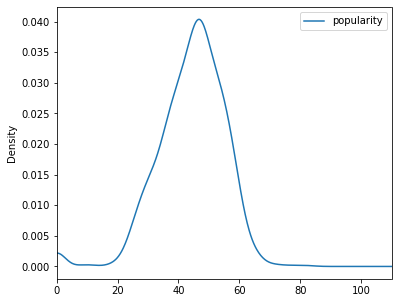

In [49]:
df_2.plot.density(y='popularity',xlim=[0,110],figsize=[6,5])

A maior massa de dados encontra-se na popularidade de 20 à 70

## **Preparação dos dados**

In [50]:
scaler = MinMaxScaler()
numeric_genre_df = df_2.drop(["genres", "artists"],axis=1)
scaled_genre_df = pd.DataFrame(scaler.fit_transform(numeric_genre_df.values),columns=numeric_genre_df.columns)
scaled_genre_df["genres"] = df_2["genres"]
scaled_genre_df["artists"] = df_2["artists"]
scaled_genre_df.drop("genres",axis=1).keys()
scaled_genre_df.drop("artists",axis=1).keys()


Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'key', 'mode', 'duration', 'genres'],
      dtype='object')

In [51]:
numeric_genre_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration
0,0.008410,0.25500,0.85800,0.000355,0.51300,-5.08500,0.069400,144.65300,0.23700,36.00,7,1,274
1,0.104675,0.51175,0.77175,0.387000,0.11580,-6.57800,0.076775,140.93400,0.76450,31.75,2,0,155
2,0.001190,0.58500,0.93100,0.000025,0.11500,-4.84300,0.084700,160.07900,0.81400,53.00,0,1,199
3,0.020766,0.68375,0.79320,0.000044,0.31715,-3.92975,0.178530,125.77265,0.54965,53.95,5,1,194
4,0.010400,0.26550,0.92950,0.000003,0.61550,-4.73300,0.125000,154.43450,0.49850,33.50,11,0,158


In [52]:
scaled_genre_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists
0,0.008497,0.179856,0.854414,0.000379,0.515471,0.757595,0.121403,0.545535,0.217036,0.439024,0.636364,1.0,0.431907,"alternative rock, dance-punk, double drumming,...",...And You Will Know Us by the Trail of Dead
1,0.105777,0.487710,0.765359,0.413020,0.088741,0.701284,0.141614,0.516508,0.784362,0.387195,0.181818,0.0,0.200389,"acid rock, classic garage rock, experimental, ...",13th Floor Elevators
2,0.001200,0.575540,0.929788,0.000026,0.087881,0.766723,0.163332,0.665938,0.837599,0.646341,0.000000,1.0,0.285992,"alternative metal, groove metal, melodic metal...",36 Crazyfists
3,0.020983,0.693945,0.787506,0.000047,0.305060,0.801167,0.420471,0.398171,0.553291,0.657927,0.454545,1.0,0.276265,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3
4,0.010508,0.192446,0.928240,0.000003,0.625591,0.770871,0.273774,0.621882,0.498279,0.408537,1.000000,0.0,0.206226,"oi, punk, ska",4 Skins


In [53]:
dados = scaled_genre_df._get_numeric_data().values
rotulos_genre = scaled_genre_df['artists'].values


In [54]:
mean_dados = np.mean(dados, axis=0)
M = dados - mean_dados
#Calculando a matriz de covariancia
C = M.T.dot(M) / (dados.shape[0] - 1)
#Auto-valores e auto-vetores
autovalores, autovetores = np.linalg.eig(C)

print("Auto-valores: ", autovalores)
print("Auto-vetores: ", autovetores)

Auto-valores:  [0.16659887 0.10418917 0.08902155 0.0582316  0.04420878 0.02879696
 0.00330461 0.0212994  0.00762013 0.00943393 0.01627733 0.01557525
 0.01315867]
Auto-vetores:  [[-0.12565206 -0.1163464  -0.53710866 -0.20455378 -0.24200256 -0.31212366
  -0.15294328 -0.01389628 -0.21820921 -0.28299067 -0.50424721 -0.27702862
  -0.04546277]
 [-0.00630918  0.00734087 -0.14646954 -0.44778613  0.20524391  0.34710404
  -0.12334874  0.15940642 -0.41034014  0.29013664  0.30590461 -0.45160002
   0.15694094]
 [ 0.11909858  0.10648164  0.53410139  0.18938319  0.18843257  0.06693114
  -0.55956621 -0.11533605 -0.33049506 -0.26411083 -0.25856931 -0.18505023
  -0.08282727]
 [-0.05047759 -0.13161181 -0.39032176  0.61577262  0.60754891  0.10244072
   0.06654294  0.0738983   0.02847502  0.08703328 -0.12539238 -0.1856212
  -0.02324985]
 [ 0.03023681  0.01554693  0.08858526  0.07839266 -0.02429279 -0.11547171
   0.03996169 -0.25099669  0.00176578  0.20523499 -0.24123662 -0.02723906
   0.89736812]
 [ 0.0666

In [55]:
#Ordenar os auto-valores do maior para o menor
pares_auto = [(np.abs(autovalores[i]), autovetores[:,1]) for i in range (len(autovalores))]

pares_auto.sort()
pares_auto.reverse()
#Calcular a variância explicada e a variância
total = sum(autovalores)

var_exp = [(i/total)*100 for i in sorted(autovalores, reverse=True)]

cum_var_exp = np.cumsum(var_exp)
#Visualizar as informações
x = ['PC %s' %i for i in range(1, len(autovalores)+1)]
df_temp = pd.DataFrame(
    {
        "Auto-valores": autovalores,
     "Cum_var_exp": cum_var_exp,
     "Var_exp": var_exp,
     "Componente": x
    }
)

print(df_temp)
print('')
print("Auto-vetores")
for autovetor in [p[1] for p in pares_auto]:
  print(autovetor)
print('')

    Auto-valores  Cum_var_exp    Var_exp Componente
0       0.166599    28.837491  28.837491       PC 1
1       0.104189    46.872153  18.034662       PC 2
2       0.089022    62.281371  15.409218       PC 3
3       0.058232    72.360990  10.079619       PC 4
4       0.044209    80.013324   7.652334       PC 5
5       0.028797    84.997944   4.984620       PC 6
6       0.003305    88.684771   3.686827       PC 7
7       0.021299    91.502301   2.817531       PC 8
8       0.007620    94.198305   2.696004       PC 9
9       0.009434    96.476010   2.277705      PC 10
10      0.016277    98.108979   1.632969      PC 11
11      0.015575    99.427988   1.319009      PC 12
12      0.013159   100.000000   0.572012      PC 13

Auto-vetores
[-0.1163464   0.00734087  0.10648164 -0.13161181  0.01554693  0.05225436
  0.00564416 -0.00707542  0.08660988  0.01120838  0.95977685  0.15567047
 -0.04078815]
[-0.1163464   0.00734087  0.10648164 -0.13161181  0.01554693  0.05225436
  0.00564416 -0.00707542 

In [56]:
pca = PCA(n_components=7)
pca.fit(scaled_genre_df.drop(["genres", "artists"],axis=1))

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
!pip install --upgrade kneed

Requirement already up-to-date: kneed in /usr/local/lib/python3.7/dist-packages (0.7.0)


## **Escolher melhor K**

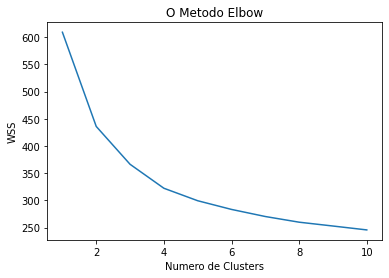

In [58]:
from sklearn.cluster import KMeans
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(dados)
    
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [59]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(pca.transform(dados))
scaled_genre_df["cluster"] = kmeans.labels_

In [60]:
scaled_genre_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
0,0.008497,0.179856,0.854414,0.000379,0.515471,0.757595,0.121403,0.545535,0.217036,0.439024,0.636364,1.0,0.431907,"alternative rock, dance-punk, double drumming,...",...And You Will Know Us by the Trail of Dead,0
1,0.105777,0.487710,0.765359,0.413020,0.088741,0.701284,0.141614,0.516508,0.784362,0.387195,0.181818,0.0,0.200389,"acid rock, classic garage rock, experimental, ...",13th Floor Elevators,3
2,0.001200,0.575540,0.929788,0.000026,0.087881,0.766723,0.163332,0.665938,0.837599,0.646341,0.000000,1.0,0.285992,"alternative metal, groove metal, melodic metal...",36 Crazyfists,2
3,0.020983,0.693945,0.787506,0.000047,0.305060,0.801167,0.420471,0.398171,0.553291,0.657927,0.454545,1.0,0.276265,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3,2
4,0.010508,0.192446,0.928240,0.000003,0.625591,0.770871,0.273774,0.621882,0.498279,0.408537,1.000000,0.0,0.206226,"oi, punk, ska",4 Skins,3


In [61]:
scaled_genre_df[scaled_genre_df["cluster"] == 2]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
2,0.001200,0.575540,0.929788,0.000026,0.087881,0.766723,0.163332,0.665938,0.837599,0.646341,0.000000,1.0,0.285992,"alternative metal, groove metal, melodic metal...",36 Crazyfists,2
3,0.020983,0.693945,0.787506,0.000047,0.305060,0.801167,0.420471,0.398171,0.553291,0.657927,0.454545,1.0,0.276265,"dance pop, electropowerpop, pop, pop punk, pop...",3OH!3,2
6,0.030503,0.588729,0.620031,0.301673,0.149441,0.585218,0.065223,0.447484,0.515666,0.410569,0.181818,1.0,0.321012,"oi, pub rock, punk",999,2
7,0.220407,0.632294,0.661217,0.186323,0.127620,0.644739,0.046832,0.285214,0.828876,0.306233,0.181818,1.0,0.184825,"bubblegum pop, chicano punk, classic garage ro...",? & The Mysterians,2
8,0.133517,0.707434,0.931853,0.488047,0.044639,0.653384,0.104138,0.399286,0.588083,0.335366,0.181818,1.0,0.570039,"art rock, chamber psych, dance rock, dance-pun...",A Certain Ratio,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0.369859,0.387290,0.767166,0.315902,0.065589,0.663888,0.194848,0.435752,0.382125,0.554878,0.000000,1.0,0.548638,"canadian indie, dance-punk, freak folk, indie ...",Wolf Parade,2
1040,0.096301,0.479445,0.737296,0.000123,0.116275,0.729911,0.064832,0.457952,0.437513,0.705575,0.181818,1.0,0.301556,"modern alternative rock, modern rock, neon pop...",You Me At Six,2
1042,0.105728,0.506155,0.705524,0.002536,0.208172,0.705237,0.052142,0.413417,0.413852,0.708130,0.000000,1.0,0.373541,"indie pop, indie rock, modern alternative rock...",Young the Giant,2
1047,0.000891,0.156275,0.949062,0.204917,0.264432,0.831897,0.272860,0.821334,0.203520,0.658537,0.272727,1.0,0.344358,"melodic metalcore, metalcore, post-screamo, sc...",blessthefall,2


In [62]:
scaled_genre_df[scaled_genre_df["artists"] == "Black Flag"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
102,0.257465,0.269159,0.723171,0.255703,0.370621,0.421264,0.211624,0.380185,0.278936,0.392365,1.0,1.0,0.270428,"alternative rock, hardcore punk, punk",Black Flag,0


In [63]:
scaled_genre_df[scaled_genre_df["artists"] == "Fugazi"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
312,0.078161,0.394045,0.719773,0.389395,0.246136,0.625451,0.127633,0.356647,0.449595,0.461382,1.0,1.0,0.252918,"alternative rock, dc hardcore, indie rock, noi...",Fugazi,0


In [64]:
scaled_genre_df[scaled_genre_df["artists"] == "Rites of Spring"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
630,0.003384,0.131894,0.939339,0.666222,0.250161,0.732033,0.082077,0.317973,0.433211,0.371951,0.636364,1.0,0.184825,"dc hardcore, emo, emo punk, emocore, post-hard...",Rites of Spring,0


In [65]:
scaled_genre_df[scaled_genre_df["artists"] == "Minor Threat"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
497,0.037493,0.254053,0.928921,0.173561,0.222424,0.687402,0.282006,0.584633,0.586234,0.463902,0.363636,1.0,0.110895,"dc hardcore, hardcore punk, post-hardcore, pun...",Minor Threat,2


In [66]:
scaled_genre_df[scaled_genre_df["artists"] == "Dinosaur Jr."]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
241,0.067281,0.151787,0.889675,0.109207,0.223066,0.725493,0.176542,0.493467,0.371811,0.457927,0.818182,1.0,0.416342,"alternative pop, alternative rock, grunge, ind...",Dinosaur Jr.,0


In [67]:
scaled_genre_df[scaled_genre_df["artists"] == "Dag Nasty"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
207,0.001697,0.315348,0.863449,0.000024,0.259508,0.71902,0.204234,0.347752,0.305227,0.393293,0.090909,0.0,0.192607,"dc hardcore, emo, emocore, hardcore, hardcore ...",Dag Nasty,3


In [68]:
scaled_genre_df[scaled_genre_df["artists"] == "At The Drive In"]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,duration,genres,artists,cluster
68,0.066719,0.308153,0.905893,0.000193,0.318865,0.792666,0.386681,0.521775,0.339489,0.491289,1.0,0.0,0.336576,"alternative metal, alternative rock, dance-pun...",At The Drive In,3


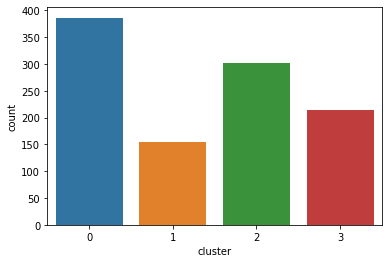

In [69]:
ax = sns.countplot(x="cluster", data=scaled_genre_df)

In [70]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [71]:
dados = scaled_genre_df.iloc[:, :-1]
rotulos = scaled_genre_df.iloc[:, 15]

In [72]:
X_resampled, y_resampled = SMOTE().fit_resample(dados.drop(["genres", "artists"],axis=1), rotulos)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [73]:
print(Counter(y_resampled))

Counter({0: 386, 3: 386, 2: 386, 1: 386})


In [74]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [75]:
X_train, X_validate, X_test = train_validate_test_split(pd.DataFrame(X_resampled))

In [76]:
y_train, y_validate, y_test = train_validate_test_split(pd.DataFrame(y_resampled))

In [77]:
train, validate, test = train_validate_test_split(scaled_genre_df)

In [78]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, 15]

X_validate = validate.iloc[:, :-1]
y_validate = validate.iloc[:, 15]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, 15]

## **Random Forest**

In [79]:
def extract_final_losses(history):
    """Função para extrair o melhor loss de treino e validação.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    Dicionário contendo o melhor loss de treino e de validação baseado 
    no menor loss de validação.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    idx_min_val_loss = np.argmin(val_loss)
    return {'train_loss': train_loss[idx_min_val_loss], 'val_loss': val_loss[idx_min_val_loss]}

def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

In [80]:
def ks_stat(y, yhat):
    return stats.ks_2samp(yhat[y==1], yhat[y!=1]).statistic

In [81]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 1000, log=True)
    max_depth = trial.suggest_int("max_depth", 10, 60, log=True)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 12)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 12)
    rf_clf = sklearn.ensemble.RandomForestClassifier(
        max_depth=max_depth, n_estimators=n_estimators, max_features = 'auto', min_samples_leaf = min_samples_leaf, min_samples_split=min_samples_split, n_jobs=-1, verbose=1
    )

    rf_clf.fit(X_train.drop(["genres", "artists"],axis=1), y_train.values.ravel())
    rf_pred_class = rf_clf.predict(X_validate.drop(["genres", "artists"],axis=1))
    rf_pred_scores = rf_clf.predict_proba(X_validate.drop(["genres", "artists"],axis=1))
    #rf_pred_scores = np.transpose([pred[:, 1] for pred in rf_pred_scores])
    return ks_stat(y_validate.values.ravel(), rf_pred_scores[:, 1])

In [82]:
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2021-05-03 23:15:33,098] A new study created in memory with name: no-name-27cd02ba-c0a9-4aff-8fca-4f5a34011e36
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 334 out of 334 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 334 out of 334 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 334 out of 334 | elapsed:    0.1s finished
[I 2021-05-03 23:15:34,039] Trial 0 finished with value: 0.9066308

FrozenTrial(number=49, values=[0.9399641577060932], datetime_start=datetime.datetime(2021, 5, 3, 23, 16, 0, 264817), datetime_complete=datetime.datetime(2021, 5, 3, 23, 16, 0, 594702), params={'n_estimators': 32, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9}, distributions={'n_estimators': IntLogUniformDistribution(high=1000, low=10, step=1), 'max_depth': IntLogUniformDistribution(high=60, low=10, step=1), 'min_samples_leaf': IntUniformDistribution(high=12, low=1, step=1), 'min_samples_split': IntUniformDistribution(high=12, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=49, state=TrialState.COMPLETE, value=None)


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rf_clf = sklearn.ensemble.RandomForestClassifier(
        max_depth=21, n_estimators=616, max_features = 'auto', min_samples_leaf = 1, min_samples_split=8, n_jobs=-1, verbose=1
    )



rf_clf.fit(X_train.drop(["genres", "artists"],axis=1), y_train.values.ravel())
rf_pred_class = rf_clf.predict(X_validate.drop(["genres", "artists"],axis=1))
rf_pred_scores = rf_clf.predict_proba(X_validate.drop(["genres", "artists"],axis=1))
print("Accuracy:",metrics.accuracy_score(y_validate.values, rf_pred_class))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 616 out of 616 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 616 out of 616 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 616 out of 616 | elapsed:    0.2s finis

Accuracy: 0.9620853080568721


In [84]:
rf_pred_class = rf_clf.predict(X_test.drop(["genres", "artists"],axis=1))
rf_pred_scores = rf_clf.predict_proba(X_test.drop(["genres", "artists"],axis=1))

print('\n\nRandom Forest')
print("Accuracy:",metrics.accuracy_score(y_test.values, rf_pred_class))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 616 out of 616 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 616 out of 616 | elapsed:    0.2s finished




Random Forest
Accuracy: 0.981042654028436


In [108]:
print(classification_report(y_validate, rf_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.87      0.87      0.87        31
           2       0.98      0.96      0.97        55
           3       1.00      1.00      1.00        42

    accuracy                           0.96       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.96      0.96      0.96       211



In [105]:
print(classification_report(y_test, rf_pred_class))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        83
           1       0.88      0.95      0.91        22
           2       1.00      0.98      0.99        62
           3       1.00      1.00      1.00        44

    accuracy                           0.98       211
   macro avg       0.97      0.98      0.97       211
weighted avg       0.98      0.98      0.98       211



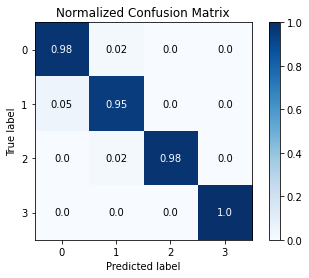

In [85]:
skplt.metrics.plot_confusion_matrix(y_test, rf_pred_class, normalize=True)
plt.show()

## **SVM**

In [113]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf_SVM.fit(X_train.drop(["genres", "artists"],axis=1), y_train.values.ravel())
rf_pred_class_SVM = clf_SVM.predict(X_validate.drop(["genres", "artists"],axis=1))

print("Accuracy:",metrics.accuracy_score(y_validate.values, rf_pred_class_SVM))

Accuracy: 0.9620853080568721


In [114]:
rf_pred_class_SVM_train = clf_SVM.predict(X_train.drop(["genres", "artists"],axis=1))

In [115]:
print(classification_report(y_train, rf_pred_class_SVM_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.98      1.00      0.99       101
           2       1.00      0.99      0.99       184
           3       1.00      1.00      1.00       128

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633



In [104]:
print(classification_report(y_validate, rf_pred_class_SVM))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        83
           1       0.91      0.97      0.94        31
           2       0.95      0.98      0.96        55
           3       1.00      1.00      1.00        42

    accuracy                           0.96       211
   macro avg       0.96      0.97      0.96       211
weighted avg       0.96      0.96      0.96       211



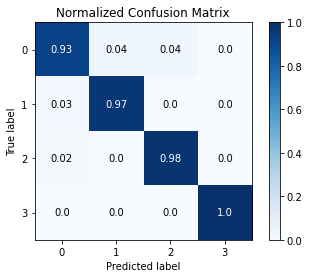

In [87]:
skplt.metrics.plot_confusion_matrix(y_validate, rf_pred_class_SVM, normalize=True)
plt.show()

# **KNN**

In [92]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

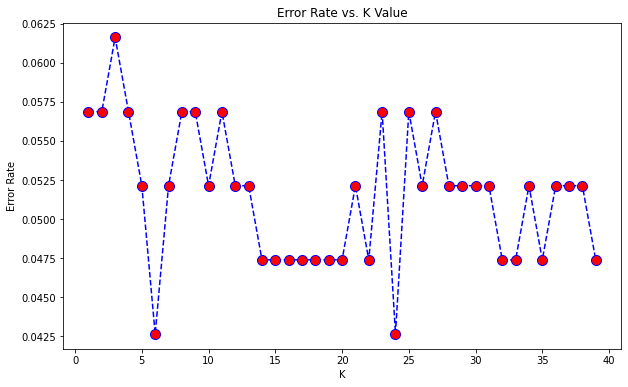

In [95]:
error_rate = []
  
# Will take some time
for i in range(1, 40):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train.drop(["genres", "artists"],axis=1), y_train)
    pred_i = knn.predict(X_validate.drop(["genres", "artists"],axis=1))
    error_rate.append(np.mean(pred_i != y_validate))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

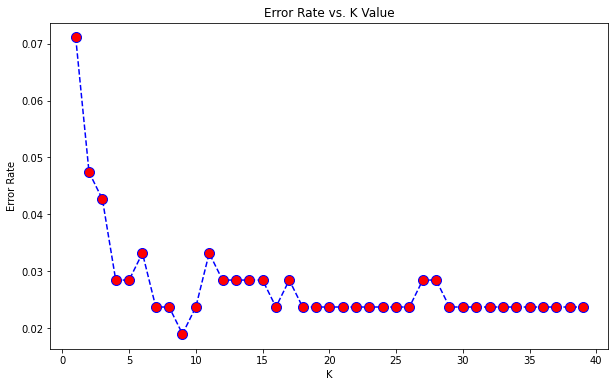

In [96]:
error_rate = []
  
# Will take some time
for i in range(1, 40):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train.drop(["genres", "artists"],axis=1), y_train)
    pred_i = knn.predict(X_test.drop(["genres", "artists"],axis=1))
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report

clf_neigh = NearestNeighbors(n_neighbors=10)
clf_neigh.fit(X_train.drop(["genres", "artists"],axis=1), y_train)
pred = knn.predict(X_test.drop(["genres", "artists"],axis=1))

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        83
           1       1.00      0.82      0.90        22
           2       0.97      0.98      0.98        62
           3       1.00      1.00      1.00        44

    accuracy                           0.98       211
   macro avg       0.98      0.95      0.96       211
weighted avg       0.98      0.98      0.98       211



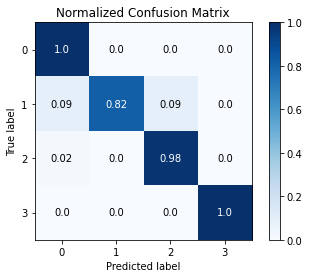

In [102]:
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
plt.show()